In [ ]:
import sys
!conda install --yes --prefix {sys.prefix} plotly

In [2]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans
import plotly as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)

import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
def highlight_max(s):    
    is_max = s == s.max()
    return ['background-color: blue' if v else '' for v in is_max]
 
df.style.apply(highlight_max, subset=['Score','GDP per capita','Social support','Healthy life expectancy','Freedom to make life choices','Generosity','Perceptions of corruption'])

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.6,1.383,1.573,0.996,0.592,0.252,0.41
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298
5,6,Switzerland,7.48,1.452,1.526,1.052,0.572,0.263,0.343
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.33,0.38
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226


In [5]:
df.describe()

,Overall rank,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,78.500000,5.407096,0.905147,1.208814,0.725244,0.392571,0.184846,0.110603
std,45.177428,1.113120,0.398389,0.299191,0.242124,0.143289,0.095254,0.094538
min,1.000000,2.853000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,39.750000,4.544500,0.602750,1.055750,0.547750,0.308000,0.108750,0.047000
50%,78.500000,5.379500,0.960000,1.271500,0.789000,0.417000,0.177500,0.085500
75%,117.250000,6.184500,1.232500,1.452500,0.881750,0.507250,0.248250,0.141250
max,156.000000,7.769000,1.684000,1.624000,1.141000,0.631000,0.566000,0.453000


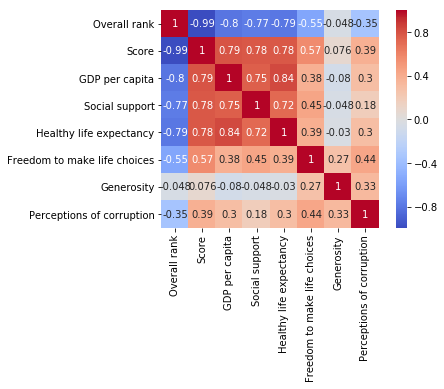

In [6]:
corrmatrix = df.corr()
f, ax = plt.subplots()
sns.heatmap(corrmatrix, square=True,cmap ='coolwarm' ,annot = True)

In [7]:
asia = ["Israel", "United Arab Emirates", "Singapore", "Thailand", "Taiwan Province of China",
"Qatar", "Saudi Arabia", "Kuwait", "Bahrain", "Malaysia", "Uzbekistan", "Japan",
"South Korea", "Turkmenistan", "Kazakhstan", "Turkey", "Hong Kong S.A.R., China", "Philippines",
"Jordan", "China", "Pakistan", "Indonesia", "Azerbaijan", "Lebanon", "Vietnam",
"Tajikistan", "Bhutan", "Kyrgyzstan", "Nepal", "Mongolia", "Palestinian Territories",
"Iran", "Bangladesh", "Myanmar", "Iraq", "Sri Lanka", "Armenia", "India", "Georgia",
 "Cambodia", "Afghanistan", "Yemen", "Syria"]
europe = ["Norway", "Denmark", "Iceland", "Switzerland", "Finland",
"Netherlands", "Sweden", "Austria", "Ireland", "Germany",
"Belgium", "Luxembourg", "United Kingdom", "Czech Republic",
"Malta", "France", "Spain", "Slovakia", "Poland", "Italy",
"Russia", "Lithuania", "Latvia", "Moldova", "Romania",
"Slovenia", "North Cyprus", "Cyprus", "Estonia", "Belarus",
"Serbia", "Hungary", "Croatia", "Kosovo", "Montenegro",
"Greece", "Portugal", "Bosnia and Herzegovina", "Macedonia",
"Bulgaria", "Albania", "Ukraine"]
north_america = ["Canada", "Costa Rica", "United States", "Mexico",  
"Panama","Trinidad and Tobago", "El Salvador", "Belize", "Guatemala",
"Jamaica", "Nicaragua", "Dominican Republic", "Honduras",
"Haiti"]
south_america = ["Chile", "Brazil", "Argentina", "Uruguay",
"Colombia", "Ecuador", "Bolivia", "Peru",
"Paraguay", "Venezuela"]
australia = ["New Zealand", "Australia"]
d_asia = dict.fromkeys(asia , 'Asia')
d_asia
d_north_america = dict.fromkeys(north_america , 'NA')
d_north_america
d_south_america = dict.fromkeys(south_america , 'SA')
d_south_america
d_europe = dict.fromkeys(europe ,'Europe')
d_europe
d_australia = dict.fromkeys(australia  , 'Aus')
d_australia
# concatanating dictionaries
# the method used below is called generalised expression method
d_cont = {**d_asia  ,**d_australia ,**d_europe ,**d_north_america ,**d_south_america}
df['Continent']  = df['Country or region'].map(d_cont)
df['Continent'].fillna('Africa' ,inplace =True)

africa = df[df['Continent'] == 'Africa']
europe = df[df['Continent'] == 'Europe']
South_america = df[df['Continent'] =='SA']
North_america = df[df['Continent'] == 'NA']
asia  = df[df['Continent'] == 'Asia']
Australia  = df[df['Continent'] == 'Aus']

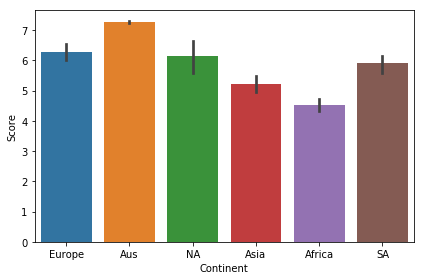

In [8]:
sns.barplot(df['Continent']  ,df['Score'])
plt.tight_layout()

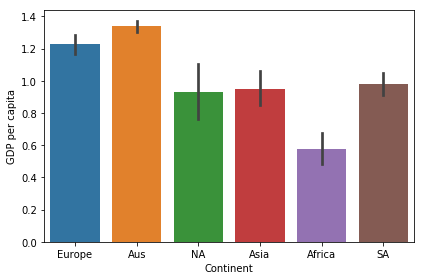

In [9]:
sns.barplot(df['Continent'] , df['GDP per capita'])
plt.tight_layout()

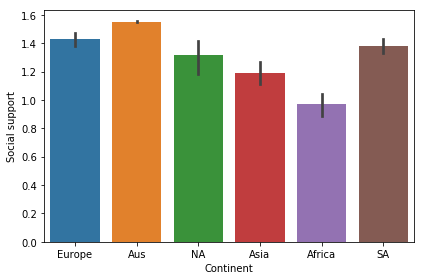

In [10]:
sns.barplot(df['Continent'] ,df['Social support'])
plt.tight_layout()

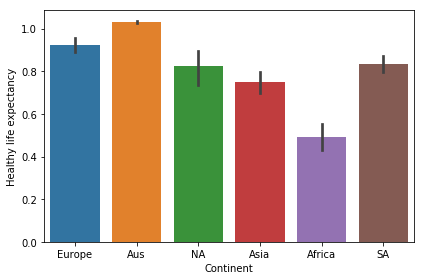

In [11]:
sns.barplot(df['Continent'] ,df['Healthy life expectancy'])
plt.tight_layout()

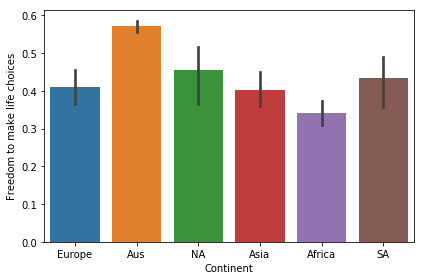

In [12]:
sns.barplot(df['Continent'] ,df['Freedom to make life choices'])
plt.tight_layout()

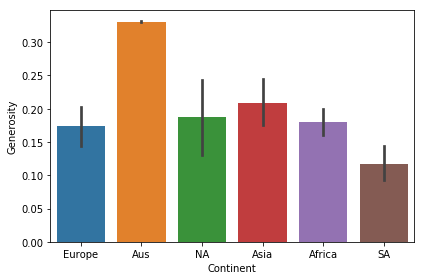

In [13]:
sns.barplot(df['Continent'] ,df['Generosity'])
plt.tight_layout()

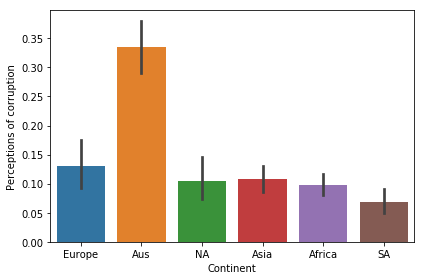

In [14]:
sns.barplot(df['Continent'] ,df['Perceptions of corruption'])
plt.tight_layout()

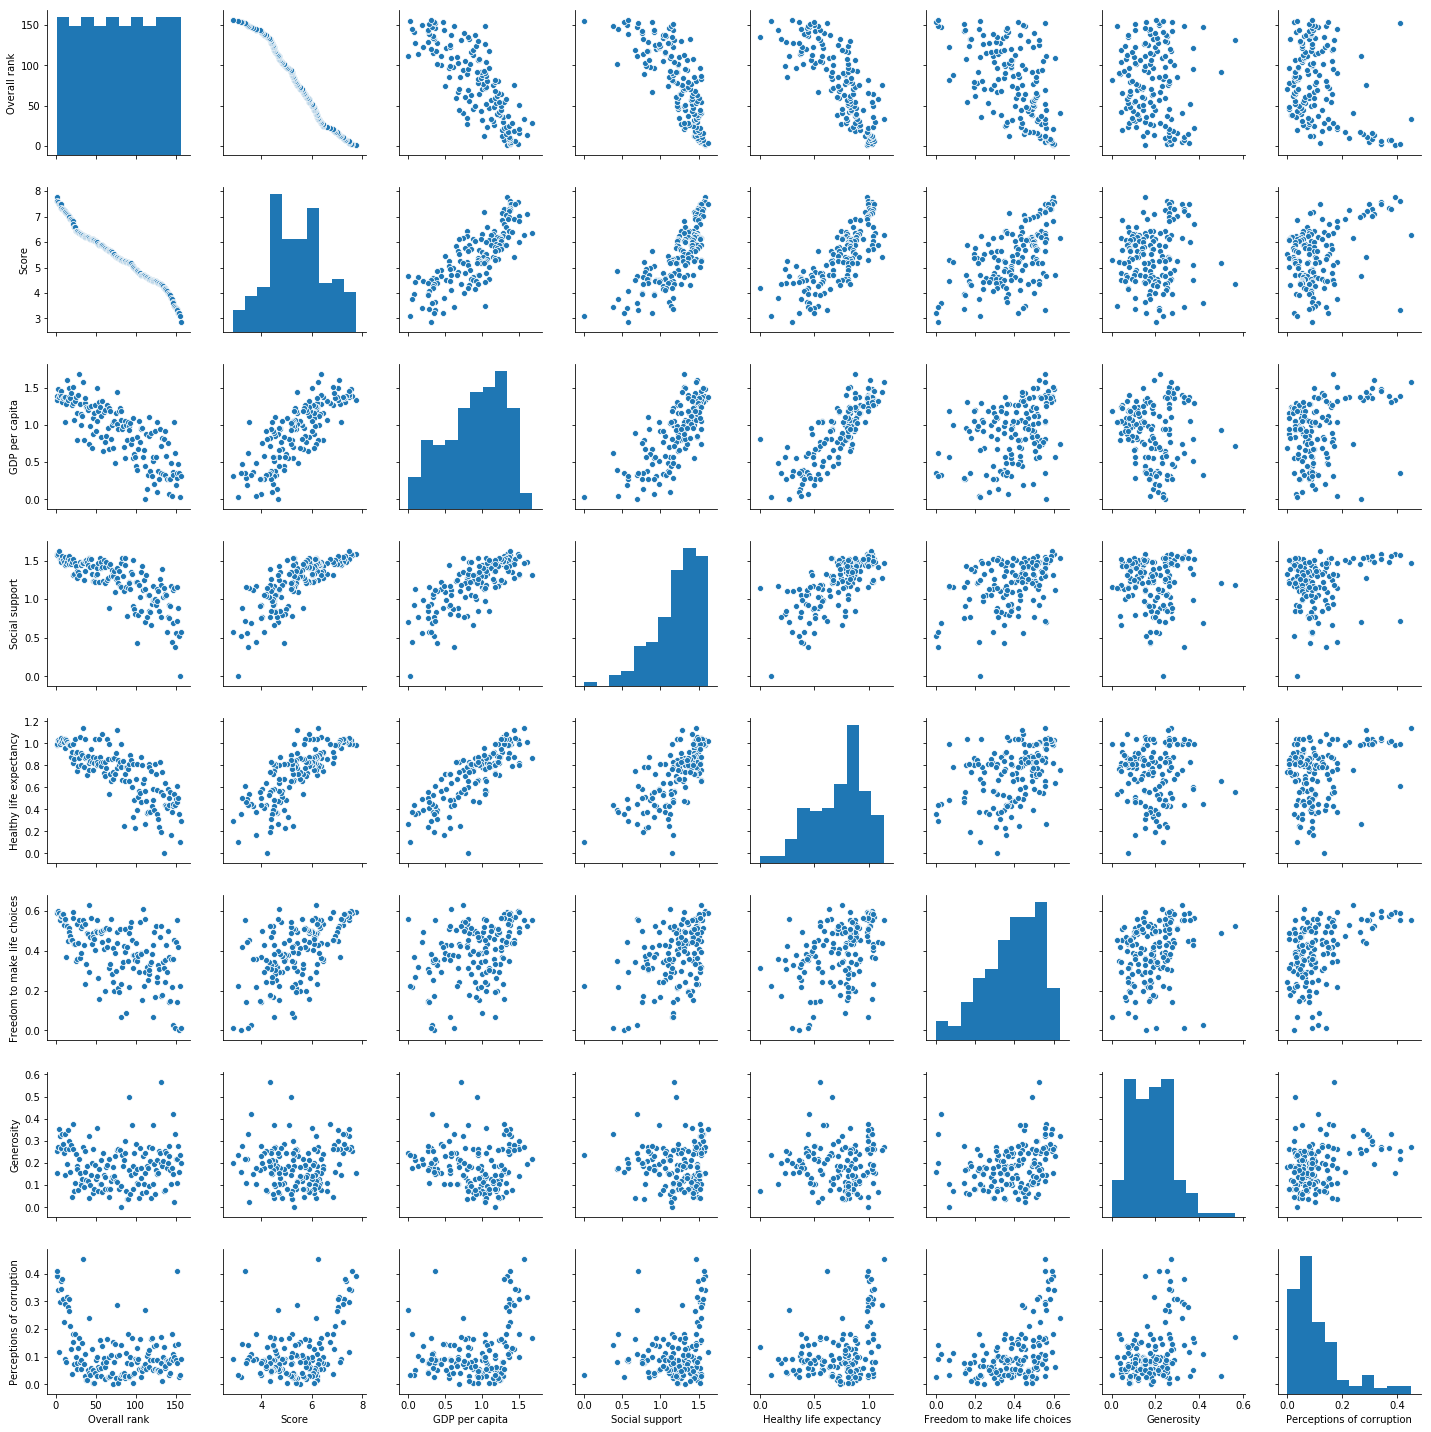

In [15]:
sns.pairplot(df)

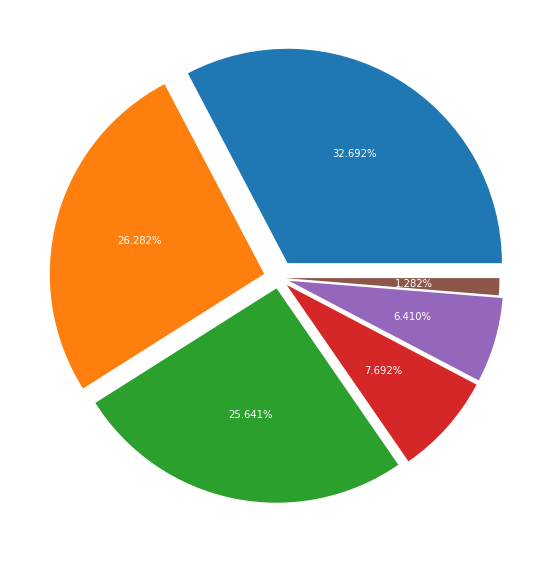

In [16]:
cnt1 = df['Continent'].value_counts()
plt.figure(figsize=(8 ,8))
explode = [0.08 ,0.07,0.05, 0.05, 0.05, 0.03 ]
plt.pie(labels=  cnt1.index , x= cnt1.values ,rotatelabels=True , autopct = '%1.3f%%' ,explode =explode,textprops={'color':"w"})

plt.tight_layout()

In [17]:
# mean and median happiness scores of each continents
ser1  = pd.Series(df['Continent'].unique())
ser2  = pd.Series([africa['Score'].mean() ,europe['Score'].mean() ,
          North_america['Score'].mean() ,South_america['Score'].mean() ,
          Australia['Score'].mean() ,asia['Score'].mean()])
ser3  = pd.Series([africa['Score'].median() ,europe['Score'].median() ,
          North_america['Score'].median() ,South_america['Score'].median() ,
          Australia['Score'].median() ,asia['Score'].median()])
df2 = pd.concat([ser1 ,ser2 ,ser3] ,axis = 1 ,keys = ['Continent' ,'Mean' ,'Median' ] )
df2.sort_values(by=['Mean','Median'])

,Continent,Mean,Median
0,Europe,4.518216,4.5090
5,SA,5.214341,5.2080
3,Asia,5.920200,6.0570
2,NA,6.151583,6.2870
1,Aus,6.293350,6.1655
4,Africa,7.267500,7.2675


In [21]:
print('max:',df['Score'].max())
print('min:',df['Score'].min())
diff=df['Score'].max()-df['Score'].min()
grp=round(diff/3,3)
print('range difference:',(grp))
low=df['Score'].min()+grp
mid=low+grp

print('upper bound of Low grp',mid)
print('upper bound of High grp','max:',df['Score'].max())

max: 7.769
min: 2.853
range difference: 1.639
upper bound of Low grp 6.131
upper bound of High grp max: 7.769


In [22]:
cat=[]
for i in df.Score:
    if(i>0 and i<mid):
        cat.append('Low')
        
    else:
         cat.append('High')

df['Category']=cat

In [23]:
color = (df.Category == 'High' ).map({True: 'background-color: green',False:'background-color: darkred'})
df.style.apply(lambda s: color)

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Continent,Category
0,1,Finland,7.769,1.34,1.587,0.986,0.596,0.153,0.393,Europe,High
1,2,Denmark,7.6,1.383,1.573,0.996,0.592,0.252,0.41,Europe,High
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341,Europe,High
3,4,Iceland,7.494,1.38,1.624,1.026,0.591,0.354,0.118,Europe,High
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298,Europe,High
5,6,Switzerland,7.48,1.452,1.526,1.052,0.572,0.263,0.343,Europe,High
6,7,Sweden,7.343,1.387,1.487,1.009,0.574,0.267,0.373,Europe,High
7,8,New Zealand,7.307,1.303,1.557,1.026,0.585,0.33,0.38,Aus,High
8,9,Canada,7.278,1.365,1.505,1.039,0.584,0.285,0.308,NA,High
9,10,Austria,7.246,1.376,1.475,1.016,0.532,0.244,0.226,Europe,High


## K-Means Clustering

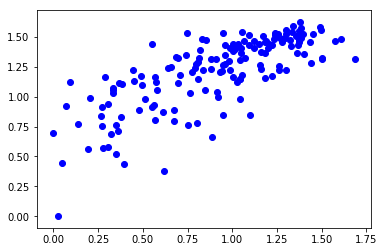

In [24]:
X = df[["GDP per capita","Social support"]]
plt.scatter(X["GDP per capita"],X["Social support"],c='blue')
plt.show()

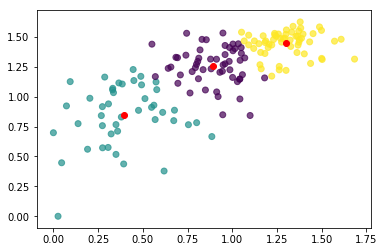

In [25]:
kmeans = KMeans(n_clusters=3).fit(X)
centroids = kmeans.cluster_centers_
# print(centroids)

plt.scatter(X['GDP per capita'], X['Social support'], c= kmeans.labels_.astype(float), alpha=0.7)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red')
plt.show()

## Choropleth plots

In [26]:
data = dict(type = 'choropleth',
            locations = df['Country or region'],
            locationmode = 'country names',
            colorscale= 'Viridis',
            z= df['GDP per capita'],
            colorbar = {'title':'range'})
layout = dict(title = 'GDP per capita ' ,geo =dict(showframe =True ,projection ={"type" : 'orthographic'}))
choropleth = go.Figure(data= [data] ,layout = layout)
py.offline.plot(choropleth)

'temp-plot.html'

In [28]:
data = dict(type = 'choropleth',
            locations = df['Country or region'],
            locationmode = 'country names',
            colorscale= 'Viridis',
            z= df['Social support'],
            colorbar = {'title':'range'})
layout = dict(title = 'Social support ' ,geo =dict(showframe =True ,projection ={"type" : 'orthographic'}))
choropleth = go.Figure(data= [data] ,layout = layout)
py.offline.plot(choropleth)

'temp-plot.html'

In [29]:
data = dict(type = 'choropleth',
            locations = df['Country or region'],
            locationmode = 'country names',
            colorscale= 'Viridis',
            z= df['Healthy life expectancy'],
            colorbar = {'title':'range'})
layout = dict(title = 'Healthy life expectancy' ,geo =dict(showframe =True ,projection ={"type" : 'orthographic'}))
choropleth = go.Figure(data= [data] ,layout = layout)
py.offline.plot(choropleth)

'temp-plot.html'

In [30]:
data = dict(type = 'choropleth',
            locations = df['Country or region'],
            locationmode = 'country names',
            colorscale= 'Viridis',
            z= df['Freedom to make life choices'],
            colorbar = {'title':'range'})
layout = dict(title = 'Freedom to make life choices' ,geo =dict(showframe =True ,projection ={"type" : 'orthographic'}))
choropleth = go.Figure(data= [data] ,layout = layout)
py.offline.plot(choropleth)

'temp-plot.html'